# Skin Cancer Detection models 🩺 | CNN, NN and Logistic Regression

#### Prologue
This notebook explores melanoma classification using machine learning.
The objective is **construct** and **analyze** three models: a neural network, logistic regression, and a CNN.

#### Dataset Overview
Comprising 13,900 uniformly-sized images at 224 x 224 pixels, which provides a comprehensive portrayal of diverse manifestations of melanoma. Each image is meticulously labeled as either `benign` or `malignant`.

In [1]:
import os
import random
#----------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#----------
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, mean_squared_error, accuracy_score, precision_score, recall_score
#----------
import matplotlib.pyplot as plt
#----------
import numpy as np
#----------
import warnings
warnings.filterwarnings('ignore')

## Load and preprocess the dataset

In [3]:
# Path to the dataset archive
archive_path = r'parth\to\archive'

In [4]:
# Define the main folder path after extraction
main_folder_path = os.path.splitext(archive_path)[0]  # Remove the extension

The main folder contains 2 folders - train and test - and each of them conatins 2 folder - Benign and Malignant

In [5]:
# Define subfolders
data_folders = ["train", "test"]
class_folders = ["Benign", "Malignant"]

In [6]:
# Paths for train and test data
train_data_path = os.path.join(main_folder_path, data_folders[0])
test_data_path = os.path.join(main_folder_path, data_folders[1])

Set those hyperparamaters as you wish

In [7]:
img_width, img_height = 112, 112 
batch_size = 128
epochs = 25

In [8]:
# Data generators
train_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 11879 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


### Samples Examples

In [81]:
# Get the first batch from the training generator
x_batch, y_batch = next(train_generator)

# Extract features and label from the first element in the batch
first_features = x_batch[0]
first_label = y_batch[0]

# Get the mapping of class indices to class names
class_indices = train_generator.class_indices

# Reverse the mapping to get class names to class indices
class_names = {v: k for k, v in class_indices.items()}

# Extract the numerical label of the first element in the batch
numerical_label = int(first_label)

# Get the corresponding class name
label_name = class_names[numerical_label]
print(int(first_label), "stands for", label_name)

1 stands for Malignant


In [9]:
# Display information about the dataset
shapes = np.shape(train_generator[0][0])
print("A batch contains", shapes[0], "samples of", shapes[1], "x", shapes[2], "x", shapes[3])

A batch contains 128 samples of 112 x 112 x 3


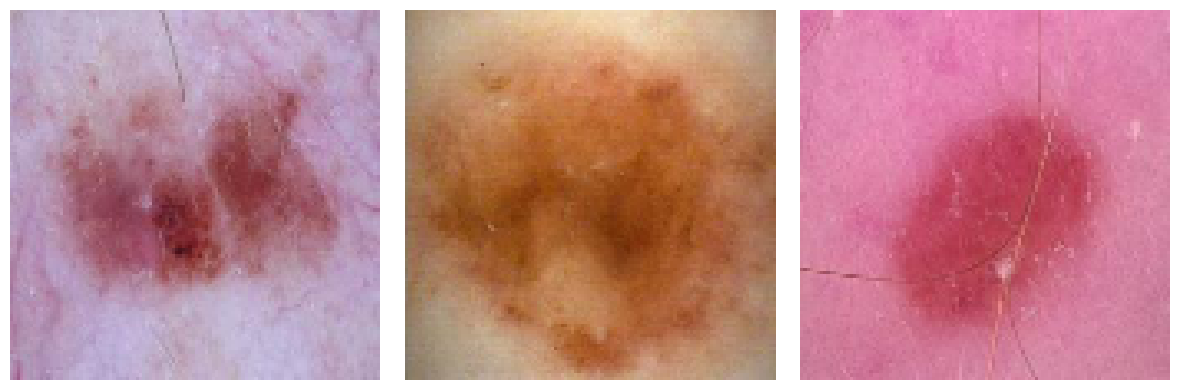

In [11]:
# Select 3 random indices from the list
random_indices = random.sample(range(len(train_generator)), 3)

# Display the selected images in a 3x1 grid
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, index in enumerate(random_indices):
    # Show each image
    image = train_generator[index][0][0]
    axes[i].imshow(image)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Models

This section involves constructing three models: a Neural Network (NN), Logistic Regression, and Convolutional Neural Network (CNN). Each model is analyzed individually, followed by a comparative evaluation to discern their respective performance characteristics.

## Neural Network 

### Creation

In [12]:
def create_nn(num_hidden_layers, hidden_layer_sizes):
    """
    Create a neural network with dynamic hidden layers.

    Parameters:
    - num_hidden_layers: Integer specifying the number of hidden layers for each set of sizes.
    - hidden_layer_size: List of integers specifying the size of each hidden layer.
    """
    model = Sequential()
    
    # Flatten the input data
    model.add(Flatten(input_shape=(img_width, img_height, 3)))

    # Add hidden layers
    for i in range(num_hidden_layers):
        model.add(tf.keras.layers.Dense(hidden_layer_sizes[i], activation='relu'))
            
    # Output layer with binary classification
    model.add(Dense(1, activation='sigmoid')) 

    # Compile the model
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy'])

    return model

In [13]:
# Define NN sizes
hidden_layer_sizes = [64, 32, 32]
num_hidden_layers = len(hidden_layer_sizes)

# Get the NN model
nn_model = create_nn(num_hidden_layers, hidden_layer_sizes)

# Display the model architecture
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 37632)             0         
                                                                 
 dense (Dense)               (None, 64)                2408512   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2411681 (9.20 MB)
Trainable params: 2411681 (9.20 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# Compile model
nn_model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Training and evaluating

In [44]:
history = nn_model.fit(train_generator, epochs=epochs, validation_data=test_generator)

# Evaluate the model
test_loss, test_acc = nn_model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}')

Epoch 1/25
93/93 [==============================] - 78s 836ms/step - loss: 0.3214 - accuracy: 0.8573 - val_loss: 0.4656 - val_accuracy: 0.7630
Epoch 2/25
93/93 [==============================] - 23s 243ms/step - loss: 0.3417 - accuracy: 0.8506 - val_loss: 0.3862 - val_accuracy: 0.8230
Epoch 3/25
93/93 [==============================] - 23s 247ms/step - loss: 0.3352 - accuracy: 0.8492 - val_loss: 0.3576 - val_accuracy: 0.8415
Epoch 4/25
93/93 [==============================] - 22s 236ms/step - loss: 0.3298 - accuracy: 0.8538 - val_loss: 0.3464 - val_accuracy: 0.8595
Epoch 5/25
93/93 [==============================] - 31s 337ms/step - loss: 0.3222 - accuracy: 0.8590 - val_loss: 0.3232 - val_accuracy: 0.8790
Epoch 6/25
93/93 [==============================] - 32s 340ms/step - loss: 0.3184 - accuracy: 0.8594 - val_loss: 0.3260 - val_accuracy: 0.8790
Epoch 7/25
93/93 [==============================] - 22s 235ms/step - loss: 0.3149 - accuracy: 0.8630 - val_loss: 0.3823 - val_accuracy: 0.8160

### Training Results

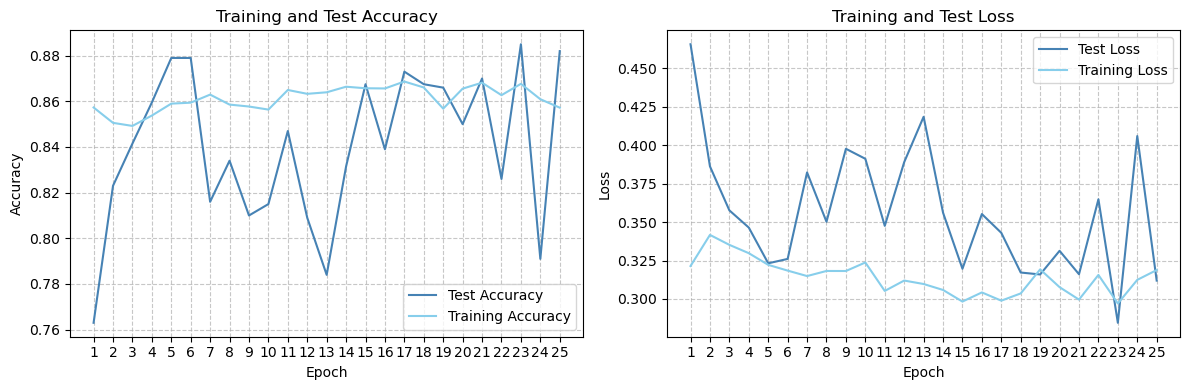

In [56]:
# Plot training and test accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(np.arange(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'], label='Test Accuracy', color="steelblue")
plt.plot(np.arange(1, len(history.history['accuracy']) + 1), history.history['accuracy'], label='Training Accuracy', color="skyblue")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(1, len(history.history['accuracy']) + 1))
plt.legend()

# Plot training and test loss values
plt.subplot(1, 2, 2)
plt.plot(np.arange(1, len(history.history['val_loss']) + 1), history.history['val_loss'], label='Test Loss', color="steelblue")
plt.plot(np.arange(1, len(history.history['loss']) + 1), history.history['loss'], label='Training Loss', color="skyblue")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(1, len(history.history['loss']) + 1))
plt.legend()

plt.tight_layout()
plt.show()

### Model Evaluation Metrics

In [52]:
# Evaluate the model on the test data and get predictions
predicted_probabilities = nn_model.predict(test_generator)

# Convert probabilities to binary predictions (0 or 1)
predicted_labels = np.round(predicted_probabilities).astype(np.int32)

# Get true labels
true_labels = test_generator.classes

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(true_labels, predicted_labels)

# Calculate Accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate Precision
precision = precision_score(true_labels, predicted_labels)

# Calculate Recall
recall = recall_score(true_labels, predicted_labels)

print(f'MSE:       {mse:.5f}')
print(f'Accuracy:  {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall:    {recall:.5f}')

16/16 [==============================] - 4s 257ms/step
MSE:       0.11800
Accuracy:  0.88200
Precision: 0.87016
Recall:    0.89800


### Classification Report

In [53]:
# Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=["Benign", "Malignant"])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

      Benign       0.89      0.87      0.88      1000
   Malignant       0.87      0.90      0.88      1000

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



### Confution Matrix

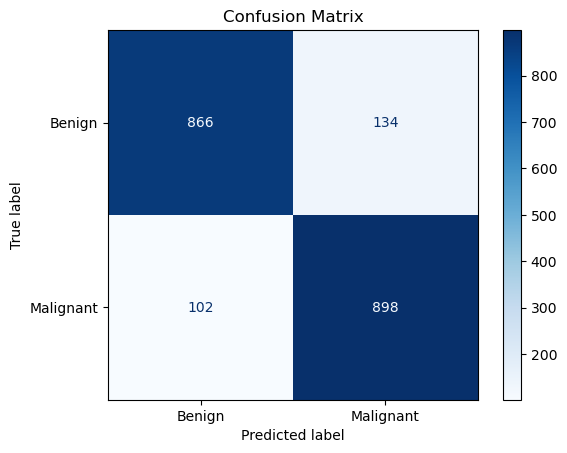

In [54]:
# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

## Logistic Regression

### Creation

In [23]:
def create_logistic_regression_model(input_shape, num_classes):
    """
    Create a logistic regression model.

    Parameters:
    - input_shape: Tuple, shape of the input data (e.g., (height, width, channels)).
    - num_classes: Integer, number of classes for classification.

    Returns:
    - lr_model: Compiled logistic regression model.
    """
    lr_model = Sequential()
  
    # Add an input layer with the specified input shape
    lr_model.add(tf.keras.Input(shape=input_shape))

    # Flatten the input
    lr_model.add(tf.keras.layers.Flatten())

    # Add a dense layer with the number of classes
    lr_model.add(tf.keras.layers.Dense(num_classes))
    
    # Apply softmax activation to the output layer
    lr_model.add(tf.keras.layers.Softmax())
    
    # Compile the model with Adam optimizer, sparse categorical crossentropy loss, and accuracy metric
    lr_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

    return lr_model

In [24]:
# Model parameters
input_shape = (img_width, img_height, 3)
num_classes = 2

In [25]:
# Get model
lr_model = create_logistic_regression_model(input_shape, num_classes)

# Display the model architecture
lr_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 37632)             0         
                                                                 
 dense_5 (Dense)             (None, 2)                 75266     
                                                                 
 softmax_1 (Softmax)         (None, 2)                 0         
                                                                 
Total params: 75266 (294.01 KB)
Trainable params: 75266 (294.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Training and evaluating

In [45]:
# Train
lr_history = lr_model.fit(
  train_generator,
  epochs=epochs,
  validation_data=test_generator  
)

# Evaluate
test_loss, test_acc = lr_model.evaluate(test_generator)
print('Test accuracy:', test_acc)

Epoch 1/25
93/93 [==============================] - 89s 954ms/step - loss: 0.4476 - accuracy: 0.8087 - val_loss: 0.4739 - val_accuracy: 0.7610
Epoch 2/25
93/93 [==============================] - 27s 294ms/step - loss: 0.5956 - accuracy: 0.7720 - val_loss: 0.6300 - val_accuracy: 0.7265
Epoch 3/25
93/93 [==============================] - 26s 279ms/step - loss: 0.5034 - accuracy: 0.8012 - val_loss: 0.3895 - val_accuracy: 0.8225
Epoch 4/25
93/93 [==============================] - 26s 283ms/step - loss: 0.4843 - accuracy: 0.8008 - val_loss: 0.5145 - val_accuracy: 0.7965
Epoch 5/25
93/93 [==============================] - 26s 280ms/step - loss: 0.5513 - accuracy: 0.7883 - val_loss: 0.3916 - val_accuracy: 0.8325
Epoch 6/25
93/93 [==============================] - 27s 290ms/step - loss: 0.4863 - accuracy: 0.8034 - val_loss: 0.5385 - val_accuracy: 0.7460
Epoch 7/25
93/93 [==============================] - 26s 282ms/step - loss: 0.8286 - accuracy: 0.7354 - val_loss: 0.4548 - val_accuracy: 0.7995

### Training Results

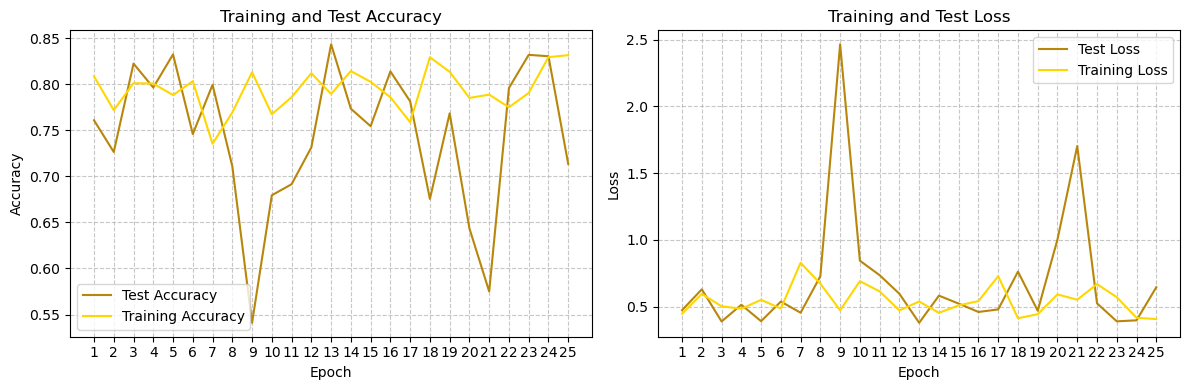

In [57]:
# Plot training and test accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(np.arange(1, len(lr_history.history['val_accuracy']) + 1), lr_history.history['val_accuracy'], label='Test Accuracy', color='darkgoldenrod')
plt.plot(np.arange(1, len(lr_history.history['accuracy']) + 1), lr_history.history['accuracy'], label='Training Accuracy', color='gold')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(1, len(lr_history.history['val_accuracy']) + 1))
plt.legend()

# Plot training and test loss values
plt.subplot(1, 2, 2)
plt.plot(np.arange(1, len(lr_history.history['val_loss']) + 1), lr_history.history['val_loss'], label='Test Loss', color='darkgoldenrod')
plt.plot(np.arange(1, len(lr_history.history['loss']) + 1), lr_history.history['loss'], label='Training Loss', color='gold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(1, len(lr_history.history['val_loss']) + 1))
plt.legend()

plt.tight_layout()
plt.show()

### Model Evaluation Metrics

In [47]:
# Evaluate the model on the test data and get predictions
predicted_probabilities = lr_model.predict(test_generator)

# Convert probabilities to binary predictions (0 or 1)
predicted_labels = np.round(predicted_probabilities).astype(np.int32)[:, 1]  # [:, 0] is the probabily to mistake.

# Get true labels
true_labels = test_generator.classes

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(true_labels, predicted_labels)

# Calculate Accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate Precision
precision = precision_score(true_labels, predicted_labels)

# Calculate Recall
recall = recall_score(true_labels, predicted_labels)

print(f'MSE:       {mse:.5f}')
print(f'Accuracy:  {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall:    {recall:.5f}')

16/16 [==============================] - 6s 368ms/step
MSE:       0.28650
Accuracy:  0.71350
Precision: 0.93131
Recall:    0.46100


### Classification Report

In [48]:
# Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=["Benign", "Malignant"])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

      Benign       0.64      0.97      0.77      1000
   Malignant       0.93      0.46      0.62      1000

    accuracy                           0.71      2000
   macro avg       0.79      0.71      0.69      2000
weighted avg       0.79      0.71      0.69      2000



### Confusion Matrix

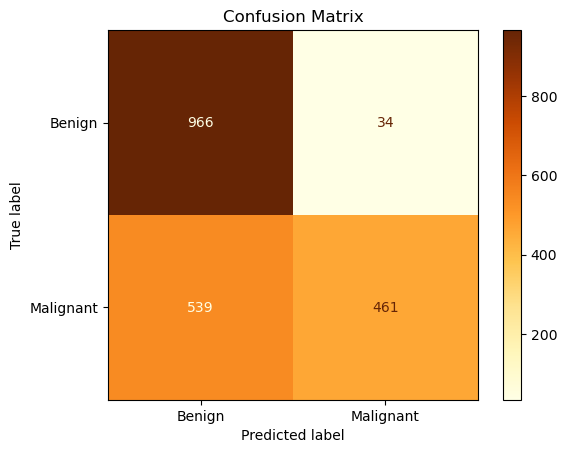

In [49]:
# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
disp.plot(cmap='YlOrBr', values_format='d')
plt.title("Confusion Matrix")
plt.show()

## Convolutional Neural Network

### Creation

In [34]:
def create_cnn_model(input_shape, num_classes, 
                    conv_layers=2, 
                    conv_filters=32,
                    conv_kernel_size=(3,3),
                    conv_activation='relu',
                    pool_size=(2,2)):

    # Create sequential model
    cnn_model = Sequential()
    
    # Add input layer
    cnn_model.add(Conv2D(conv_filters, kernel_size=conv_kernel_size, activation=conv_activation, input_shape=input_shape))
    cnn_model.add(MaxPooling2D(pool_size=pool_size))

    # Add convolutional layers
    for i in range(conv_layers):
        cnn_model.add(Conv2D(conv_filters, 
                             kernel_size=conv_kernel_size, 
                             activation=conv_activation))
        cnn_model.add(MaxPooling2D(pool_size=pool_size))

    # Fully connected layer 
    cnn_model.add(Flatten())
    cnn_model.add(Dense(num_classes, activation='sigmoid'))

    # Compile model
    cnn_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
  
    return cnn_model

In [35]:
# Model parameters
input_shape = (img_width, img_height, 3)
num_classes = 1

In [36]:
# Get model
cnn_model = create_cnn_model(input_shape, num_classes)

# Display the model architecture
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 110, 110, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 55, 55, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 53, 53, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 26, 26, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 32)       

### Training and evaluating

In [37]:
# Train
cnn_history = cnn_model.fit(
  train_generator,
  epochs=epochs,
  validation_data=test_generator  
)

# Evaluate
test_loss, test_acc = cnn_model.evaluate(test_generator)
print('Test accuracy:', test_acc)

Epoch 1/25
93/93 [==============================] - 205s 2s/step - loss: 0.5195 - accuracy: 0.7326 - val_loss: 0.4983 - val_accuracy: 0.8020
Epoch 2/25
93/93 [==============================] - 201s 2s/step - loss: 0.4150 - accuracy: 0.8097 - val_loss: 0.4344 - val_accuracy: 0.7750
Epoch 3/25
93/93 [==============================] - 112s 1s/step - loss: 0.3745 - accuracy: 0.8304 - val_loss: 0.4426 - val_accuracy: 0.7725
Epoch 4/25
93/93 [==============================] - 88s 944ms/step - loss: 0.3596 - accuracy: 0.8378 - val_loss: 0.3515 - val_accuracy: 0.8460
Epoch 5/25
93/93 [==============================] - 123s 1s/step - loss: 0.3411 - accuracy: 0.8502 - val_loss: 0.3723 - val_accuracy: 0.8240
Epoch 6/25
93/93 [==============================] - 202s 2s/step - loss: 0.3375 - accuracy: 0.8488 - val_loss: 0.3332 - val_accuracy: 0.8475
Epoch 7/25
93/93 [==============================] - 126s 1s/step - loss: 0.3323 - accuracy: 0.8542 - val_loss: 0.3771 - val_accuracy: 0.8245
Epoch 8/25


### Training Results

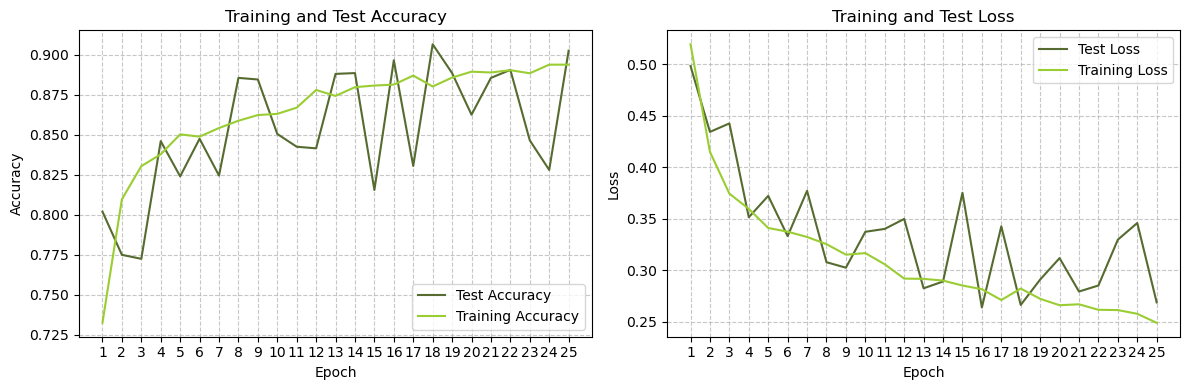

In [58]:
# Plot training and test accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(np.arange(1, len(cnn_history.history['val_accuracy']) + 1), cnn_history.history['val_accuracy'], label='Test Accuracy', color='darkolivegreen')
plt.plot(np.arange(1, len(cnn_history.history['accuracy']) + 1), cnn_history.history['accuracy'], label='Training Accuracy', color='yellowgreen')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(1, len(cnn_history.history['val_accuracy']) + 1))
plt.legend()

# Plot training and test loss values
plt.subplot(1, 2, 2)
plt.plot(np.arange(1, len(cnn_history.history['val_loss']) + 1), cnn_history.history['val_loss'], label='Test Loss', color='darkolivegreen')
plt.plot(np.arange(1, len(cnn_history.history['loss']) + 1), cnn_history.history['loss'], label='Training Loss', color='yellowgreen')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(1, len(cnn_history.history['val_loss']) + 1))
plt.legend()

plt.tight_layout()
plt.show()

### Model Evaluation Metrics

In [39]:
# Evaluate the model on the test data and get predictions
predicted_probabilities = cnn_model.predict(test_generator)

# Convert probabilities to binary predictions (0 or 1)
predicted_labels = np.round(predicted_probabilities).astype(np.int32)[:, 0]  # [:, 0] is the probabily to mistake.

# Get true labels
true_labels = test_generator.classes

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(true_labels, predicted_labels)

# Calculate Accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate Precision
precision = precision_score(true_labels, predicted_labels)

# Calculate Recall
recall = recall_score(true_labels, predicted_labels)

print(f'MSE:       {mse:.5f}')
print(f'Accuracy:  {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall:    {recall:.5f}')

16/16 [==============================] - 11s 632ms/step
MSE:       0.09750
Accuracy:  0.90250
Precision: 0.86825
Recall:    0.94900


### Classification Report

In [40]:
# Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=["Benign", "Malignant"])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

      Benign       0.94      0.86      0.90      1000
   Malignant       0.87      0.95      0.91      1000

    accuracy                           0.90      2000
   macro avg       0.91      0.90      0.90      2000
weighted avg       0.91      0.90      0.90      2000



### Confusion Matrix

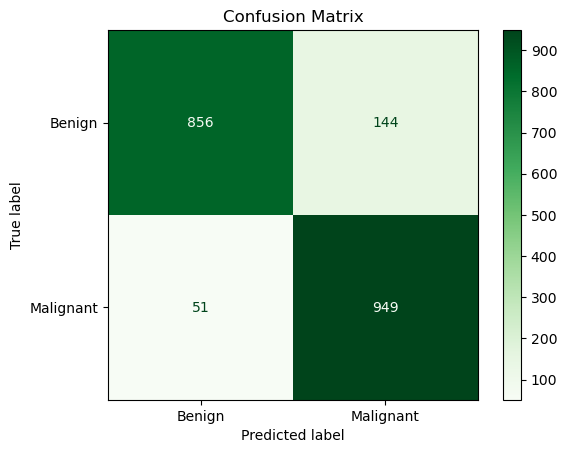

In [41]:
# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
disp.plot(cmap='Greens', values_format='d')
plt.title("Confusion Matrix")
plt.show()

## Comparation

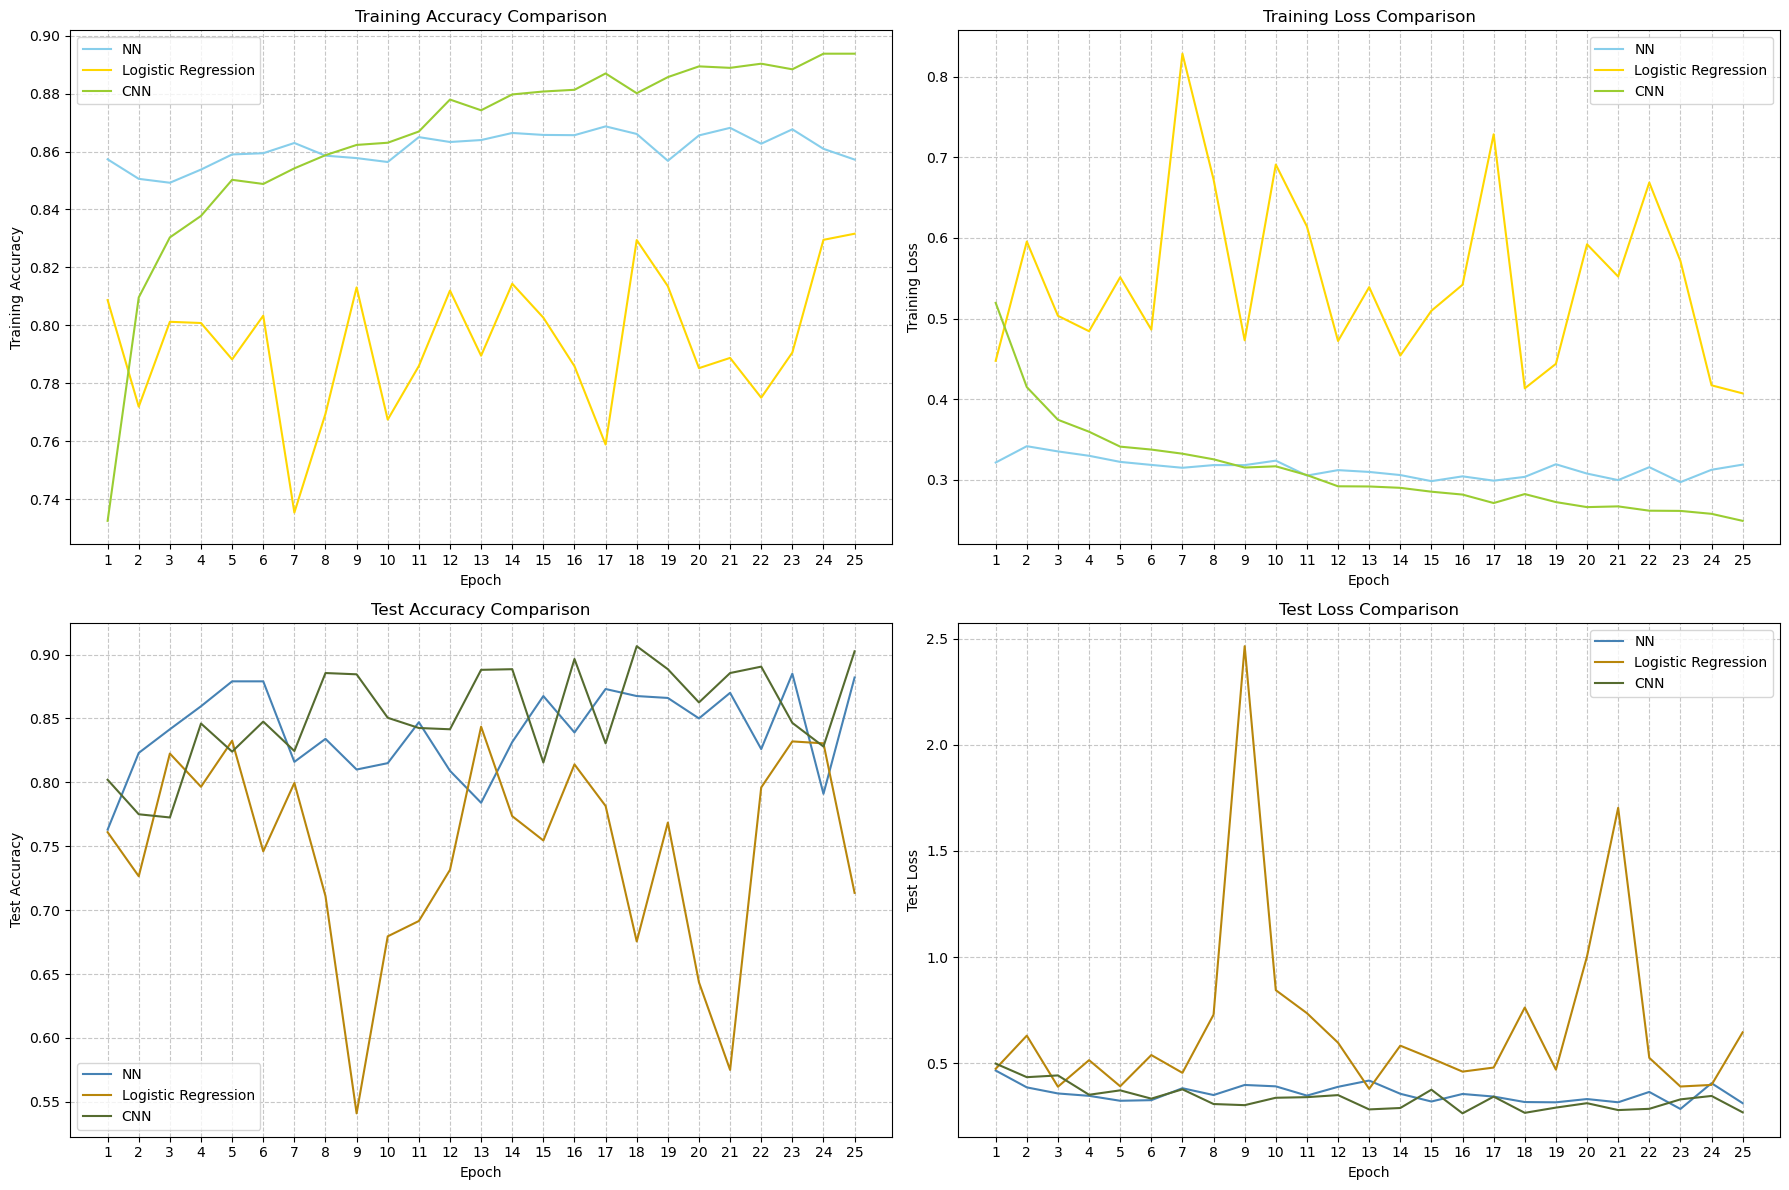

In [59]:
# Create a figure with 4 subplots
plt.figure(figsize=(18, 12))

# Comparison of Training Accuracy for all models
plt.subplot(2, 2, 1)
plt.plot(np.arange(1, len(history.history['accuracy']) + 1), history.history['accuracy'], label='NN', color="skyblue")
plt.plot(np.arange(1, len(lr_history.history['accuracy']) + 1), lr_history.history['accuracy'], label='Logistic Regression', color='gold')
plt.plot(np.arange(1, len(cnn_history.history['accuracy']) + 1), cnn_history.history['accuracy'], label='CNN', color='yellowgreen')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy Comparison')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(1, len(history.history['accuracy']) + 1))
plt.legend()

# Comparison of Training Loss for all models
plt.subplot(2, 2, 2)
plt.plot(np.arange(1, len(history.history['loss']) + 1), history.history['loss'], label='NN', color="skyblue")
plt.plot(np.arange(1, len(lr_history.history['loss']) + 1), lr_history.history['loss'], label='Logistic Regression', color='gold')
plt.plot(np.arange(1, len(cnn_history.history['loss']) + 1), cnn_history.history['loss'], label='CNN', color='yellowgreen')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Comparison')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(1, len(history.history['loss']) + 1))
plt.legend()

# Comparison of test Accuracy for all models
plt.subplot(2, 2, 3)
plt.plot(np.arange(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'], label='NN', color="steelblue")
plt.plot(np.arange(1, len(lr_history.history['val_accuracy']) + 1), lr_history.history['val_accuracy'], label='Logistic Regression', color='darkgoldenrod')
plt.plot(np.arange(1, len(cnn_history.history['val_accuracy']) + 1), cnn_history.history['val_accuracy'], label='CNN', color='darkolivegreen')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy Comparison')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(1, len(history.history['val_accuracy']) + 1))
plt.legend()

# Comparison of Test Loss for all models
plt.subplot(2, 2, 4)
plt.plot(np.arange(1, len(history.history['val_loss']) + 1), history.history['val_loss'], label='NN', color="steelblue")
plt.plot(np.arange(1, len(lr_history.history['val_loss']) + 1), lr_history.history['val_loss'], label='Logistic Regression', color='darkgoldenrod')
plt.plot(np.arange(1, len(cnn_history.history['val_loss']) + 1), cnn_history.history['val_loss'], label='CNN', color='darkolivegreen')
plt.xlabel('Epoch')
plt.ylabel('Test Loss')
plt.title('Test Loss Comparison')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(1, len(history.history['val_loss']) + 1))
plt.legend()

# Adjust layout for better visualization
plt.tight_layout()

# Show the combined plot
plt.show()

# Report

## Prediction Results

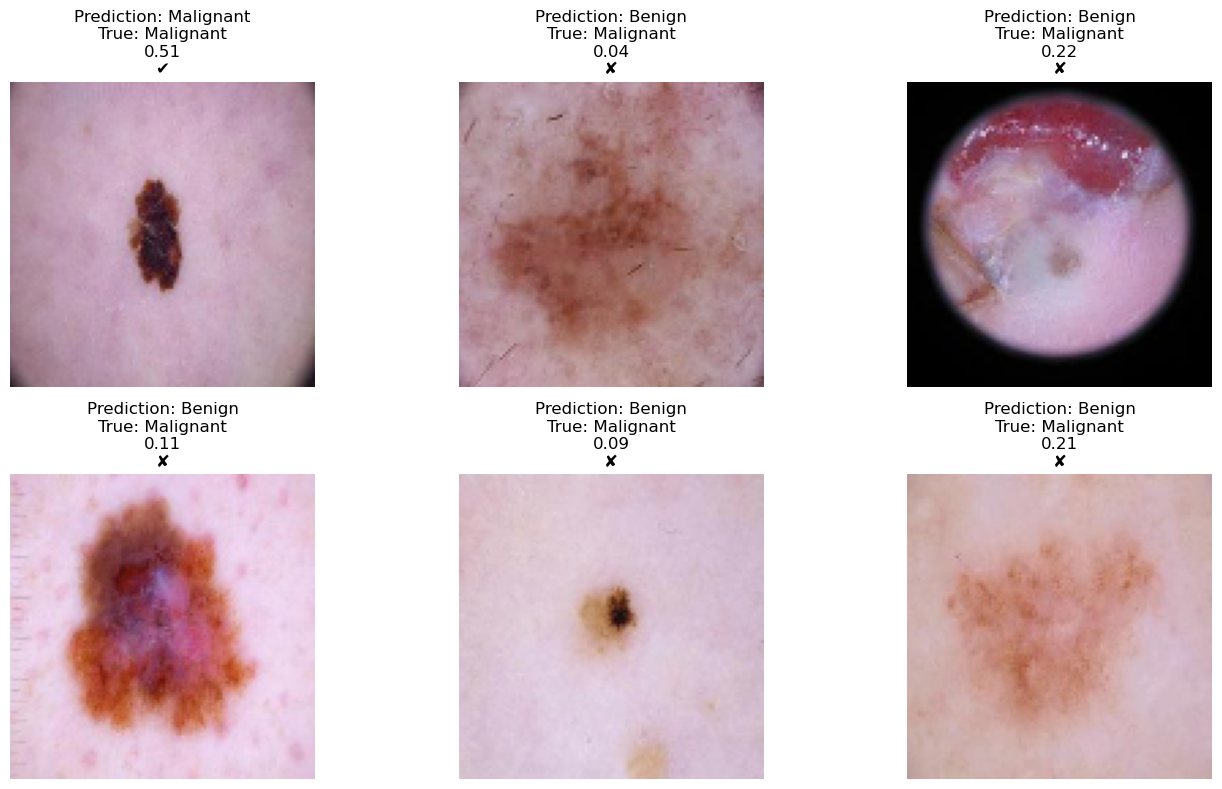

In [71]:
# Get a batch of images and labels from the test generator
batch_images, batch_labels = test_generator.next()

# Select 6 random indices from the batch
random_indices = np.random.choice(len(batch_labels), 6, replace=False)

# Create a figure with 2 rows and 3 columns
plt.figure(figsize=(14, 8))

# Display images with predicted and true labels
for i, index in enumerate(random_indices, start=1):
    plt.subplot(2, 3, i)
    plt.imshow(batch_images[index])
    plt.axis('off')
    
    # Determine the predicted class based on a threshold (e.g., 0.5)
    predicted_class = 1 if predicted_probabilities[index][0] >= 0.5 else 0
    
    # Check if the prediction is correct
    is_correct = predicted_class == batch_labels[index]
    
    # Use checkmark (✔) for correct and cross (✘) for incorrect
    sign = "✔" if is_correct else "✘"
    
    # Display prediction probability, predicted class, and true class
    plt.title(f"Prediction: {'Malignant' if predicted_class == 1 else 'Benign'}\nTrue: {'Malignant' if batch_labels[index] == 1 else 'Benign'}\n{predicted_probabilities[index][0]:.2f}\n{sign}")

# Adjust layout for better visualization
plt.tight_layout()
plt.show()